#### Importing Excel File to Python using Openpyxl
Source: https://www.datacamp.com/tutorial/python-excel-tutorial

In [1]:
# Anaconda Prompt
# conda activate ox
# pip install Openpyxl

#### My Test Run

In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.8.0'

In [2]:
# import nodes from excel file
import openpyxl 

wb = openpyxl.load_workbook('from_qgis.xlsx')
ws = wb['Coordinates']
nodes_list = [ws.cell(row=i,column=2).value for i in range(2,199+1)]
coordinates_list = [ws.cell(row=i,column=3).value for i in range(2,199+1)]
bus_stops = {nodes: coordinates for nodes, coordinates in zip(nodes_list, coordinates_list)}
print(bus_stops)

{'Monumento': '14.654455,120.983795', 'Malanday': '14.718282,120.957038', 'Mall of Asia': '14.535539,120.983720', 'PITX': '14.510395,120.992016', 'VGC': '14.711829,120.993211', 'North EDSA': '14.654670,121.029643', 'Fairview': '14.735339,121.060035', 'Quezon Ave': '14.641742,121.039311', 'Malaria': '14.769677,121.079772', 'Buendia': '14.554238,120.997071', 'Taft': '14.538141,121.000674', 'Northview': '14.684234,121.104832', 'Cubao': '14.621686,121.050018', 'Nangka': '14.669971,121.108374', 'Sta. Lucia Grandmall': '14.620197,121.099643', 'Gilmore': '14.613692,121.034162', 'D. Jose': '14.605315,120.981974', 'SM City East Ortigas': '14.588577,121.105247', 'Kalentong': '14.593758,121.026940', 'Pasig': '14.559793,121.080534', 'BGC': '14.548876,121.056359', 'Ayala': '14.549203,121.027902', 'Sucat': '14.453845,121.044929', 'Alabang': '14.415366,121.045285', 'SM Center Muntinlupa': '14.377987,121.046291', 'FTI-Taguig': '14.506545,121.035636', 'Victoneta Ave': '14.665638,120.984136', 'Marulas':

In [4]:
# visualize nodes using GIS shapefile
# Source: https://www.linkedin.com/pulse/using-geopandas-display-shapefiles-jupyter-notebooks-andrew-cutts/

# first, install GeoPandas package
# conda install geopandas

In [3]:
import geopandas as gpd

gdf = gpd.read_file('final_nodes_MM.shp')
print (gdf)

                       geometry
0    POINT (120.98385 14.65433)
1    POINT (120.98416 14.66561)
2    POINT (120.98145 14.67466)
3    POINT (120.97647 14.68567)
4    POINT (120.97468 14.68873)
..                          ...
193  POINT (121.01519 14.43095)
194  POINT (121.03081 14.42490)
195  POINT (121.05557 14.54046)
196  POINT (121.05635 14.52774)
197  POINT (121.05442 14.52292)

[198 rows x 1 columns]


<Axes: >

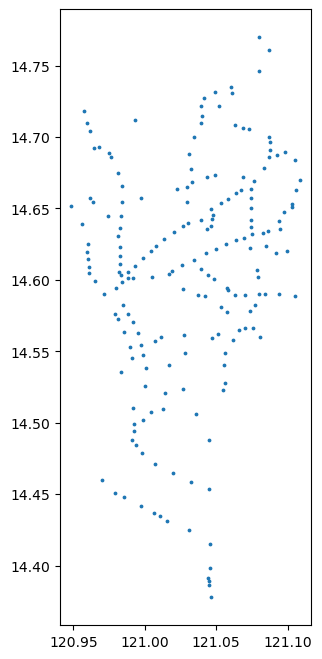

In [4]:
%matplotlib inline

# Source: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
gdf.plot(markersize=3.0, figsize=(12,8))

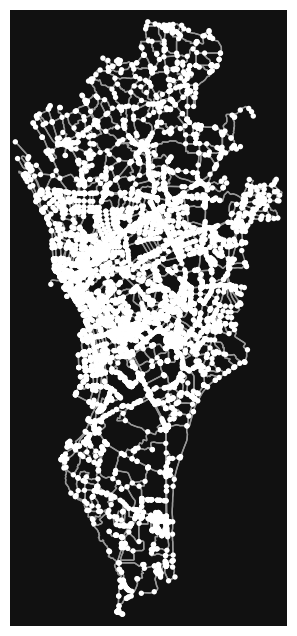

6461

In [7]:
# visualize nodes using OSMnx package in Python

from matplotlib import pyplot as plt

place = 'Metro Manila, Philippines'
G = ox.graph_from_place(place, network_type="drive", custom_filter='["highway"~"primary|secondary|tertiary|trunk|motorway_link|trunk_link|primary_link|secondary_link|tertiary_link|unclassifed|road"]')
#G = ox.graph_from_place(place, network_type="drive", custom_filter='["highway"~"primary"]')
#G = ox.graph_from_place(place, network_type="drive")

# Plot the streets
fig, ax = ox.plot_graph(G)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)
#nodes.head()
#nodes.tail()
len(nodes)

In [8]:
edges.head()

osmid   lanes  \
u        v          key                                              
12067308 25388521   0                            224039655       2   
         1723298722 0               [644875507, 840378998]  [4, 5]   
12067330 21590503   0                             22738968       2   
         6621954486 0    [156307503, 675166366, 675166367]  [4, 3]   
12067342 21590497   0                             22739769       4   

                                          name    highway maxspeed width  \
u        v          key                                                    
12067308 25388521   0    F. B. Harrison Street  secondary       40     8   
         1723298722 0                     EDSA      trunk       60   NaN   
12067330 21590503   0      Pablo Ocampo Street  secondary       40   NaN   
         6621954486 0          Roxas Boulevard      trunk       60   NaN   
12067342 21590497   0      Padre Burgos Avenue    primary       60   NaN   

                         oneway reversed   length  \
u        v          key                             
12067308 25388521   0     False     True  197.030   
         1723298722 0      True    False  175.734   
12067330 21590503   0      True    False   14.111   
         6621954486 0      True    False  243.826   
12067342 21590497   0      True    False   24.866   

                                                                  geometry  \
u        v          key                                                      
12067308 25388521   0    LINESTRING (120.99573 14.53787, 120.99572 14.5...   
         1723298722 0    LINESTRING (120.99573 14.53787, 120.99516 14.5...   
12067330 21590503   0    LINESTRING (120.98713 14.55964, 120.98701 14.5...   
         6621954486 0    LINESTRING (120.98713 14.55964, 120.98709 14.5...   
12067342 21590497   0    LINESTRING (120.97554 14.58304, 120.97544 14.5...   

                         ref junction access bridge tunnel service  
u        v          key                                             
12067308 25388521   0    NaN      NaN    NaN    NaN    NaN     NaN  
         1723298722 0      1      NaN    NaN    NaN    NaN     NaN  
12067330 21590503   0    NaN      NaN    NaN    NaN    NaN     NaN  
         6621954486 0    120      NaN    NaN    NaN    NaN     NaN  
12067342 21590497   0    150      NaN    NaN    NaN    NaN     NaN

<Axes: >

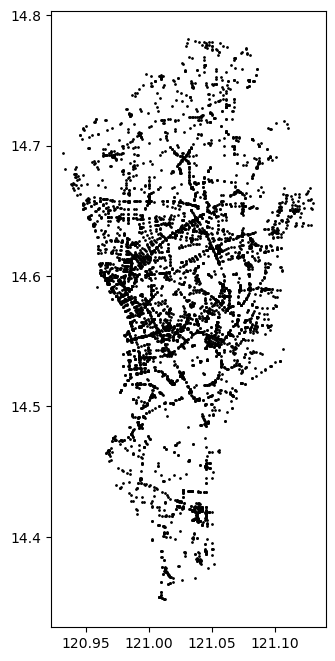

In [9]:
# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
nodes.plot(ax=ax, facecolor='black', markersize=1.0)

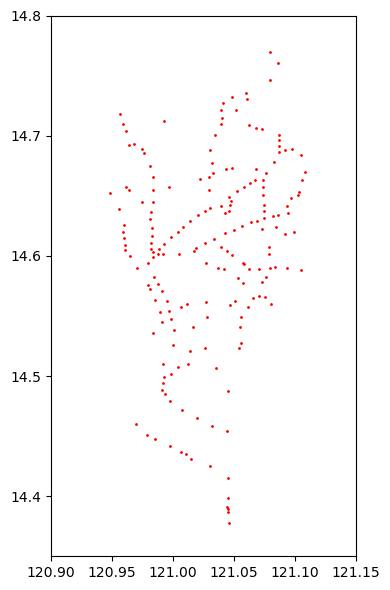

In [10]:
# visualize nodes using Excel file generated from QGIS

def plot_original_nodes():
    from matplotlib import pyplot as plt

    plt.rcParams["figure.figsize"] = [4,6]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(120.90, 121.15)
    plt.ylim(14.35, 14.80)

    for i in range(0,198):
        cxy = coordinates_list[i]
        separatexy = cxy.split(",")
        x = float(separatexy[1])
        y = float(separatexy[0])
        plt.plot(x, y, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")

    plt.show()

plot_original_nodes()

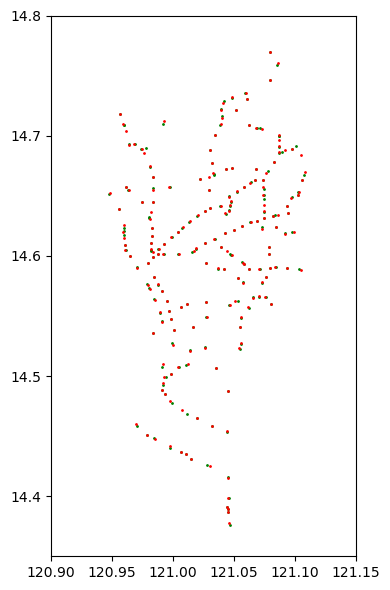

{'Monumento': (120.9838113, 14.6568151), 'Malanday': (120.9570582, 14.7182588), 'Mall of Asia': (120.9839337, 14.5357232), 'PITX': (120.9912051, 14.5071904), 'VGC': (120.9920632, 14.7100109), 'North EDSA': (121.0298618, 14.6547958), 'Fairview': (121.0590558, 14.7352821), 'Quezon Ave': (121.0390942, 14.6415717), 'Malaria': (121.0800828, 14.7693494), 'Buendia': (120.997097, 14.5541518), 'Taft': (121.0006763, 14.5379557), 'Northview': (121.1008861, 14.6910028), 'Cubao': (121.0499577, 14.6215736), 'Nangka': (121.1075175, 14.6671831), 'Sta. Lucia Grandmall': (121.0977425, 14.6199052), 'Gilmore': (121.0346112, 14.6138624), 'D. Jose': (120.9819511, 14.6051854), 'SM City East Ortigas': (121.1038256, 14.5888623), 'Kalentong': (121.0270245, 14.593744), 'Pasig': (121.0806473, 14.5598282), 'BGC': (121.0563829, 14.5481828), 'Ayala': (121.0276592, 14.5490766), 'Sucat': (121.0448073, 14.4538301), 'Alabang': (121.0453104, 14.4158689), 'SM Center Muntinlupa': (121.0470915, 14.3763515), 'FTI-Taguig': (1

In [12]:
# visualize the new nodes which are the nearest nodes to the above bus stops

# from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [4,6]
plt.rcParams["figure.autolayout"] = True
plt.xlim(120.90, 121.15)
plt.ylim(14.35, 14.80)

# finds the nearest node to a bus stop
def new_stop(bus_stop):
    lat, long = bus_stop.split(",") 
    X = float(long) 
    Y = float(lat) 
    new_stop_id = ox.nearest_nodes(G, X, Y)
    x = G.nodes[new_stop_id]['x'] 
    y = G.nodes[new_stop_id]['y']
    return x,y

# initialize list of coordinates of new nodes
new_coordinates_list = []

for i in range(0,198):
    bus_stop = coordinates_list[i]
    x,y = new_stop(bus_stop)
    # store the list of coordinates of new nodes
    zipxy = lambda x,y:(x,y)
    c = zipxy(x,y)
    new_coordinates_list.append(c)
    # plot/visualize the new nodes
    plt.plot(x, y, marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")

plot_original_nodes()
plt.show()

new_bus_stops = {nodes: coordinates for nodes, coordinates in zip(nodes_list, new_coordinates_list)}
print(new_bus_stops)

In [13]:
print(new_coordinates_list[0:5])

[(120.9838113, 14.6568151), (120.9570582, 14.7182588), (120.9839337, 14.5357232), (120.9912051, 14.5071904), (120.9920632, 14.7100109)]


In [14]:
def node_name_to_node_ID(node_name):
    x,y = new_bus_stops[node_name]
    node_ID = ox.nearest_nodes(G, x, y)
    return node_ID

node_name = 'Monumento'
node_ID = node_name_to_node_ID(node_name)
print(node_ID)

node_IDs_list = list(map(node_name_to_node_ID,nodes_list))
print(node_IDs_list[0:5])

67749699
[67749699, 5755349511, 21674735, 6100901121, 720553156]


In [15]:
# assign a number for each node
# list: node number, name, coordinates, ID
node_numbers = list(zip(range(1,199),nodes_list,new_coordinates_list, node_IDs_list))
print(node_numbers[0:5])

[(1, 'Monumento', (120.9838113, 14.6568151), 67749699), (2, 'Malanday', (120.9570582, 14.7182588), 5755349511), (3, 'Mall of Asia', (120.9839337, 14.5357232), 21674735), (4, 'PITX', (120.9912051, 14.5071904), 6100901121), (5, 'VGC', (120.9920632, 14.7100109), 720553156)]


In [52]:
# define original routes
import openpyxl 
wb = openpyxl.load_workbook('from_qgis.xlsx')
ws = wb['Final Nodes']
    
R1 = [ws.cell(row=i,column=3).value for i in range(2,11+1)]
R2 = ['Monumento'] + [ws.cell(row=i,column=3).value for i in range(12,31+1)]
R3 = ['Monumento'] + [ws.cell(row=i,column=3).value for i in range(32,33+1)]
R4 = [ws.cell(row=i,column=3).value for i in range(34,46+1)]
R5 = [ws.cell(row=i,column=3).value for i in range(47,70+1)]
R6 = ['Quezon Ave'] + [ws.cell(row=i,column=3).value for i in range(71,88+1)]
R7 = R5[0:12+1] + [ws.cell(row=i,column=3).value for i in range(89,91+1)]
R8 = [ws.cell(row=i,column=3).value for i in range(92,105+1)]
R9 = R8[0:5] + [ws.cell(row=i,column=3).value for i in range(106,108+1)]
R10 = ['Cubao'] + [ws.cell(row=i,column=3).value for i in range(109,118+1)]
R11 = ['Gilmore'] + [ws.cell(row=i,column=3).value for i in range(119,129+1)]
R12 = [ws.cell(row=i,column=3).value for i in range(130,137+1)]
R13 = ['Buendia'] + [ws.cell(row=i,column=3).value for i in range(138,144+1)]
R14 = ['Ayala', 'Chino Roces', 'Osmena Highway'] + [ws.cell(row=i,column=3).value for i in range(146,149+1)]
R15 = R14 + [ws.cell(row=i,column=3).value for i in range(150,154+1)]
R16 = R14[0:4] + [ws.cell(row=i,column=3).value for i in range(155,156+1)]
R17 = ['Monumento', '5th Ave'] + [ws.cell(row=i,column=3).value for i in range(157,161+1)] + ['D. Jose'] + R6[11:18+1]
R18 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(162,165+1)] + ['Taft', 'Mall of Asia']
R19 = R4[0:4] + [ws.cell(row=i,column=3).value for i in range(166,179+1)] + ['BGC']
R23 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(180,187+1)] + ['Sucat']
R24 = ['PITX'] + [ws.cell(row=i,column=3).value for i in range(188,196+1)] + ['Alabang']
R25 = ['BGC'] + [ws.cell(row=i,column=3).value for i in range(197,199+1)] + ['Bicutan Exit', 'Sucat', 'Alabang']
print(R25)

original_routes = [R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R23, R24, R25]

['BGC', 'Upper McKinley Rd', 'Diego Silang', 'Pinagsama', 'Bicutan Exit', 'Sucat', 'Alabang']


In [17]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

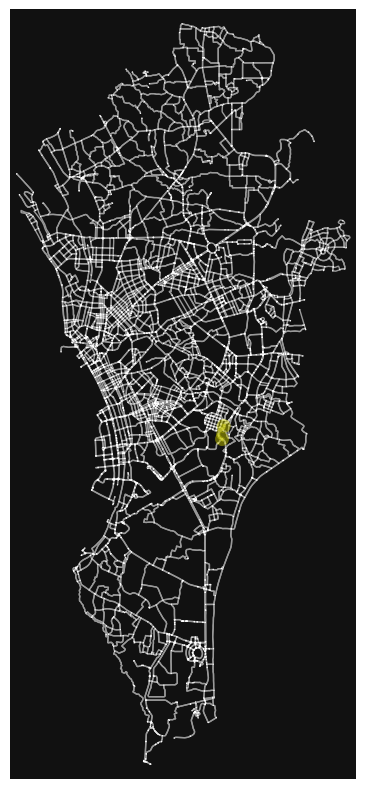

In [18]:
orig = node_name_to_node_ID('BGC')
dest = node_name_to_node_ID('Upper McKinley Rd')

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=3, node_size=1, route_alpha=0.5)

In [19]:
# OPTION 1: see the travel time for the whole route
# Source: https://stackoverflow.com/questions/62156969/osmnx-shortest-path-nodes-get-node-traveled-time
travel_time = nx.shortest_path_length(G, orig, dest, weight='travel_time')
print(round(travel_time))
length = nx.shortest_path_length(G, orig, dest, weight='length')
print(round(length))

88
1088


In [20]:
# OPTION 3: use get_route_edge_attributes
import pandas as pd

cols = ['osmid', 'length', 'travel_time']
attrs = ox.utils_graph.route_to_gdf(G, route)
print(pd.DataFrame(attrs)[cols])

                                                                       osmid  \
u          v          key                                                      
253047280  25004631   0    [984799394, 97665004, 35491533, 35491534, 3549...   
25004631   8383374981 0                                            910339873   
8383374981 3803081596 0                                            758946646   
3803081596 3859865418 0                                            382882839   

                            length  travel_time  
u          v          key                        
253047280  25004631   0    762.415         68.6  
25004631   8383374981 0     33.066          2.0  
8383374981 3803081596 0    281.894         16.9  
3803081596 3859865418 0     11.100          0.7  


In [21]:
rows = 198
cols = 198
 
time_mat = [[0 for _ in range(cols)] for _ in range(rows)]
# print(f'matrix of dimension {rows} x {cols} is {time_mat}')


In [53]:
for route in original_routes:
    print(route)
    number_of_nodes = len(route)
    print(number_of_nodes)
    for i in range(0,number_of_nodes-1):       
        node1 = node_name_to_node_ID(route[i])       
        node2 = node_name_to_node_ID(route[i+1])
        if route[i] == ('Mall of Asia') or route[i] == ('Kasiyahan') or route[i] == ('Nichols') or route[i] == ('NAIA T4') or route[i] == ('Pinagsama'):
            continue
        subroute = ox.shortest_path(G, node1, node2, weight="travel_time")
        #fig, ax = ox.plot_graph_route(G, subroute, route_color="y", route_linewidth=3, node_size=1, route_alpha=0.5)        
        travel_time = nx.shortest_path_length(G, node1, node2, weight='travel_time')
        length = nx.shortest_path_length(G, node1, node2, weight='length')
        print("Edge between %s and %s: Time is %d and Distance is %d." %(route[i],route[i+1],round(travel_time),round(length))) 

['Monumento', 'Victoneta Ave', 'Marulas', 'SM City Valenzuela', 'Karuhatan', 'Valenzuela City Hall', 'Dalandanan', 'Governor Santiago', 'T Santiago', 'Malanday']
10
Edge between Monumento and Victoneta Ave: Time is 63 and Distance is 1048.
Edge between Victoneta Ave and Marulas: Time is 60 and Distance is 994.
Edge between Marulas and SM City Valenzuela: Time is 157 and Distance is 2409.
Edge between SM City Valenzuela and Karuhatan: Time is 44 and Distance is 523.
Edge between Karuhatan and Valenzuela City Hall: Time is 51 and Distance is 737.
Edge between Valenzuela City Hall and Dalandanan: Time is 169 and Distance is 2344.
Edge between Dalandanan and Governor Santiago: Time is 133 and Distance is 1845.
Edge between Governor Santiago and T Santiago: Time is 136 and Distance is 1893.
Edge between T Santiago and Malanday: Time is 83 and Distance is 1148.
['Monumento', '5th Ave', 'A Mabini', 'Lapu-lapu', 'Dagat-dagatan', 'Navotas', '5th Ave', 'Bonifacio', 'Capulong', 'Pacheco', 'Morion

In [25]:
# define the edge (or connectivity) between nodes 
# by using a connectivity matrix (1 if connected, 0 otherwise)


[[ 7 10]
 [13  8]]


In [ ]:
# get the time matrix


In [ ]:
# candidate routes using all possible O-D pairs generated by osmnx: k-means
# route to nodes

In [ ]:
# import barangay nodes and get the nearest bus node for each

In [ ]:
# determine the travel demand matrix

#Source: https://copyprogramming.com/howto/plotting-a-route-with-osmnx

#import osmnx as ox
#ox.config(use_cache=True, log_console=True)
#place = 'Berkeley, CA, USA'
#G = ox.graph_from_place(place, network_type='drive')
#tags = {'amenity' : ['hospital','university','social_facility'],
#        'landuse' : ['retail', 'commercial'],
#        'shop' : ['water','bakery']}
#gdf = ox.geometries_from_place(place, tags)
#centroids = gdf.centroid
#X = centroids.x
#Y = centroids.y
#nn = ox.get_nearest_nodes(G, X, Y, method='balltree')

In [ ]:
# using Matlab, determine the route set
# plot/visualize the resulting route set